# Proyecto sprint 11

##### Descripción del proyecto:

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

1) Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.

2) Crear un modelo para predecir el volumen de reservas en pozos nuevos.

3) Elegir los pozos petrolíferos que tienen los valores estimados más altos.

4) Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

**Condiciones:**

- Solo se debe usar la regresión lineal para el entrenamiento del modelo.

- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.

- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

**Instrucciones del proyecto:**

1. Descarga y prepara los datos. Explica el procedimiento.

2. Entrena y prueba el modelo para cada región en geo_data_0.csv:

a) Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

b) Entrena el modelo y haz predicciones para el conjunto de validación.

c) Guarda las predicciones y las respuestas correctas para el conjunto de validación.

d) Muestra el volumen medio de reservas predicho y RMSE del modelo.

e) Analiza los resultados.

f) Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.

3. Prepárate para el cálculo de ganancias:

a) Almacena todos los valores necesarios para los cálculos en variables separadas.

b) Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

c) Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.

4. Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

a) Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

b) Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.

c) Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

5. Calcula riesgos y ganancias para cada región:

a) Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

b) Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

c)Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.utils import resample


### 1. Datos y preparación de datos

##### Descripción de los datos:

- id — identificador único de pozo de petróleo.

- f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas).

- product — volumen de reservas en el pozo de petróleo (miles de barriles).

**Importamos los datos correspondientes**

In [2]:
geo_data_0 = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 11/Proyecto/geo_data_0.csv')
geo_data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [3]:
geo_data_1 = pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 11/Proyecto/geo_data_1.csv')
geo_data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [4]:
geo_data_2=pd.read_csv('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 11/Proyecto/geo_data_2.csv')
geo_data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


**Vamos a ver si es que los dataframes están completos, o bien, si tienen valores nulos**

In [5]:
geo_data_2.info()
geo_data_2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
geo_data_1.info()
geo_data_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
geo_data_0.info()
geo_data_0.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

**Como se puede ver, los datos están completos, por lo tanto, procedo a trabajar desde un solo dataframe**

In [8]:
geo_data_complete = pd.read_excel('C:/Users/gabri/OneDrive/TripleTen/Curso/Sprint 11/Proyecto/data_3.xlsx')
geo_data_complete

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
299995,4GxBu,-1.777037,1.125220,6.263374,172.327046
299996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
299997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
299998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [9]:
#Aún así, vamos a vovler a comprobar si tenemos celdas vacías en el dataframe:
geo_data_complete.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

**Ya con los datos completos vamos a ver cómo se comporta el atributo F0, así como sus caracteríticas estadísticas:**

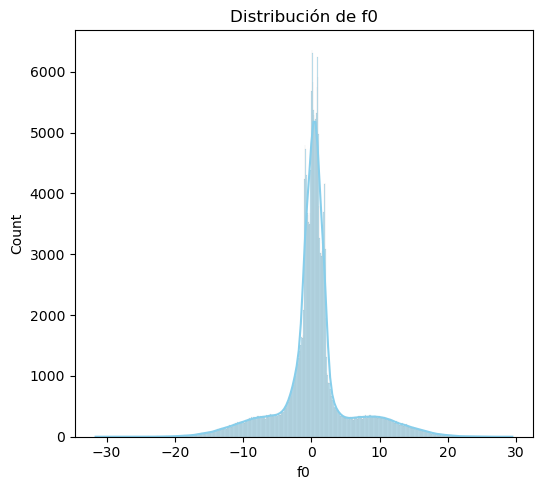

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(geo_data_complete['f0'], kde=True, color='skyblue')
plt.title('Distribución de f0')

plt.tight_layout()
plt.show()

In [11]:
print(geo_data_complete['f0'].describe())

count    300000.000000
mean          0.547913
std           5.316634
min         -31.609576
25%          -1.003037
50%           0.347934
75%           1.755365
max          29.421755
Name: f0, dtype: float64


**Hacemos el mismo proceso con el atributo f1:**

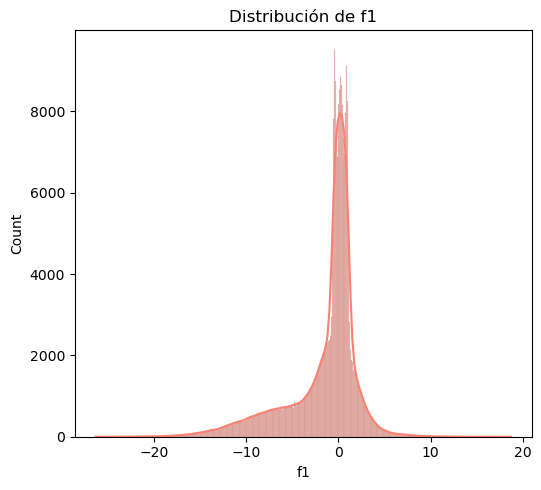

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(geo_data_complete['f1'], kde=True, color='salmon')
plt.title('Distribución de f1')

plt.tight_layout()
plt.show()

In [13]:
print(geo_data_complete['f1'].describe())

count    300000.000000
mean         -1.516172
std           3.900220
min         -26.358598
25%          -2.478939
50%          -0.229632
75%           0.678562
max          18.734063
Name: f1, dtype: float64


**Una vez más con el f2:**

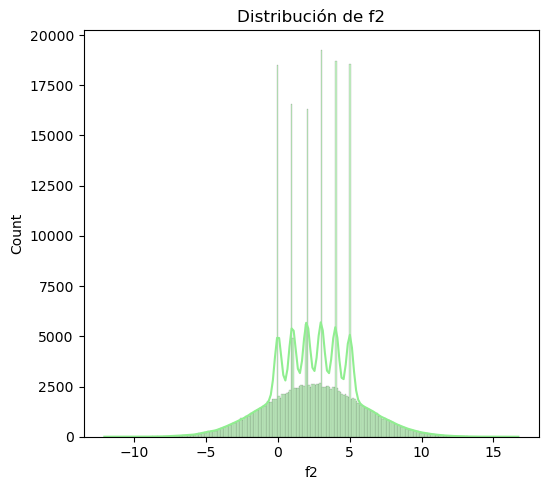

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(geo_data_complete['f2'], kde=True, color='lightgreen')
plt.title('Distribución de f2')

plt.tight_layout()
plt.show()

In [15]:
print(geo_data_complete['f2'].describe())

count    300000.000000
mean          2.497439
std           2.916502
min         -12.088328
25%           0.648213
50%           2.491215
75%           4.344943
max          16.739402
Name: f2, dtype: float64


**Ahora ofrezco una comparativa de la distribución de los tres atributos:**

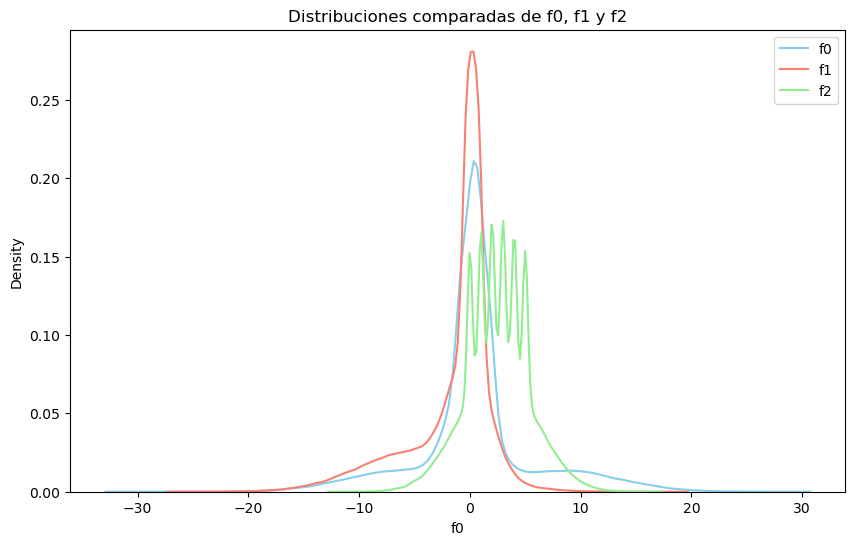

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(geo_data_complete['f0'], label='f0', color='skyblue')
sns.kdeplot(geo_data_complete['f1'], label='f1', color='salmon')
sns.kdeplot(geo_data_complete['f2'], label='f2', color='lightgreen')
plt.title('Distribuciones comparadas de f0, f1 y f2')
plt.legend()
plt.show()

No se especifican propiamente las características, pero son equivalentes en el análisis de las tres locaciones, y por ende, tendrán un grado de significancia y correlación con el volumen de venta, misma que podemos ver con la técnica recomendada en el proyecto: la regresión lineal. 

##### Vamos a hacer una breve descripción basada en estas distribuciones que desarrollo y la estadística descriptiva propia de los datos:

**a) Para el atributo f0:**

A grandes razgos podemos decir que los datos se ven distribuídos simétricamente, tenemos la media y la mediana relativamente cerca, y existe una dispersión un poco alta (con desviación estándar = 5.31)

**b) Para el tributo f1:**

Esta distribución está sesgada levemente a la derecha y la disperción es menor que el atributo f0.

**c) Para el atributo f2:**

Esta disperción es todavía menor que los otros dos conjuntos de datos. 


### 2. Entrenamiento del modelo

**a) Para la región 0:**

Coeficientes: [  3.7711081  -14.38251983   6.58467653]
Intercepto: 77.69413266005199
MSE: 1410.93
R²: 0.27


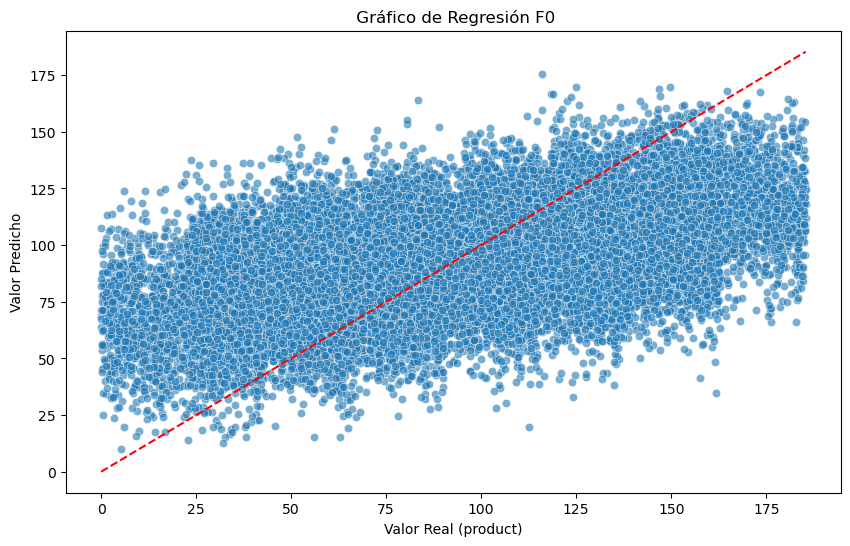

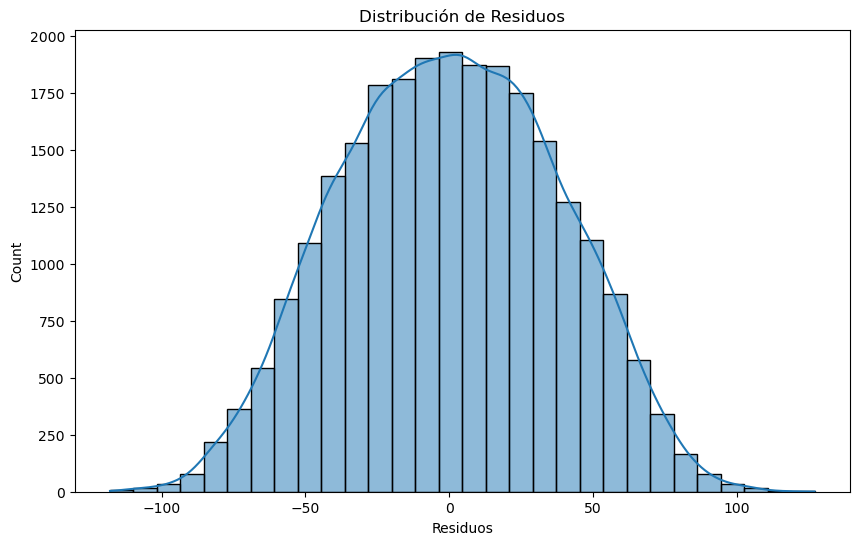

In [17]:
X = geo_data_0[['f0', 'f1', 'f2']]
y = geo_data_0['product']

# Dividimos los datos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Creamos el modelo:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Para las métricas de evaluación del modelo:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


#Gráficos:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia perfecta
plt.xlabel('Valor Real (product)')
plt.ylabel('Valor Predicho')
plt.title(' Gráfico de Regresión F0')
plt.show()

#Los residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos')
plt.show()


**Basandome en los resultados, obtenemos la siguiente ecuación:**

--> *product = 77.6941 + 3.77(f0) - 14.38(f1) + 6.58(f2)* 

Y al mismo tiempo tenemos que por cada unidad aumentada en f0, se aumenta 3.77 en el producto. También que por cada unidad aumentada en f1, el producto disminuye en 14.38 unidades. Además que por cada unidad aumentada en f2, el producto aumenta en 6.58 unidades.

El modelo no tiene una buena capacidad explicativa, ya que solo tiene un 27% de poder explicativo, y el error cuadrático medio es alto, lo que vuelve a corroborar el valor de R cuadrado.

**b) Para la región 1**

Coeficientes: [-1.44976595e-01 -2.17291853e-02  2.69504412e+01]
Intercepto: 1.6571697776299175
MSE: 0.80
R²: 1.00


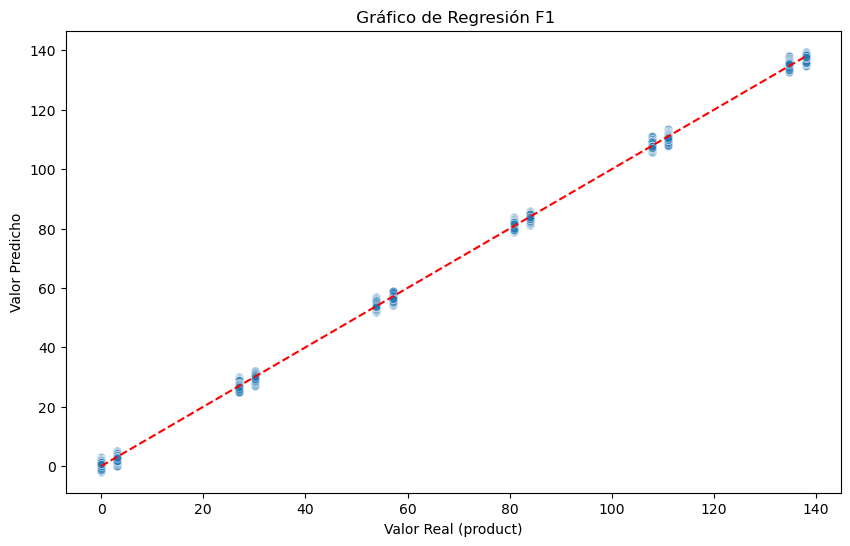

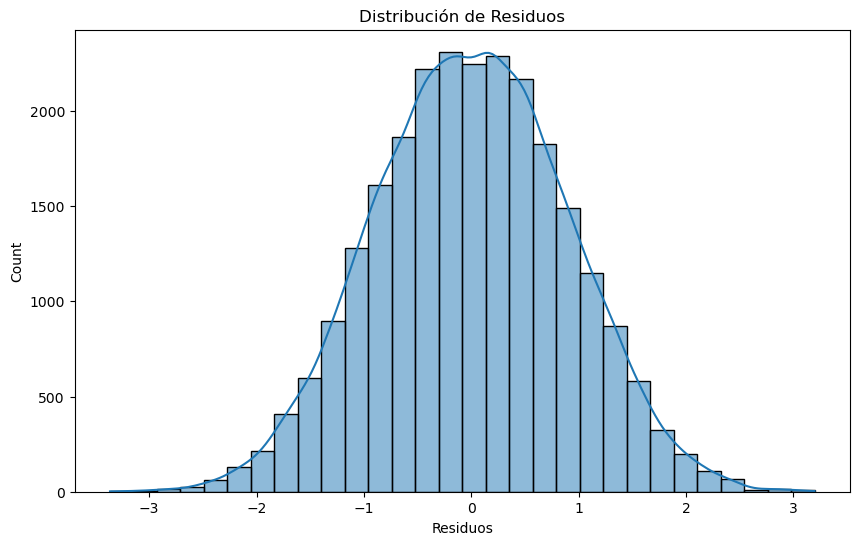

R² en validación cruzada: 1.00


In [18]:
X = geo_data_1[['f0', 'f1', 'f2']]
y = geo_data_1['product']

# Dividimos los datos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Creamos el modelo:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Para las métricas de evaluación del modelo:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


#Gráficos:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia perfecta
plt.xlabel('Valor Real (product)')
plt.ylabel('Valor Predicho')
plt.title(' Gráfico de Regresión F1')
plt.show()

#Los residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos')
plt.show()

#Como es sospechoso el poder explicativo del 100#, anexo una validación cruzada en R cuadrado:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² en validación cruzada: {scores.mean():.2f}")

Para este caso obtenemos la ecuación:

--> *product = 1.66 −0.145(f0) − 0.0217(f1) + 26.95(f2)*

Aunque el error cuadrárico medio y el R cuadrado si tienen sentido, es muy extraño encontrar un 100% de poder explicativo, mismo que se puede ver también en el gráfico de regresión. 

**Además, la validación cruzada que hago posteriormente, revela también un 100% de nivel explicativo, aún así el resultado es algo sospechoso.**

**c) Para región 2:**

Coeficientes: [-0.08681846 -0.16471456  5.74818956]
Intercepto: 80.64335103167005
MSE: 1608.27
R²: 0.20


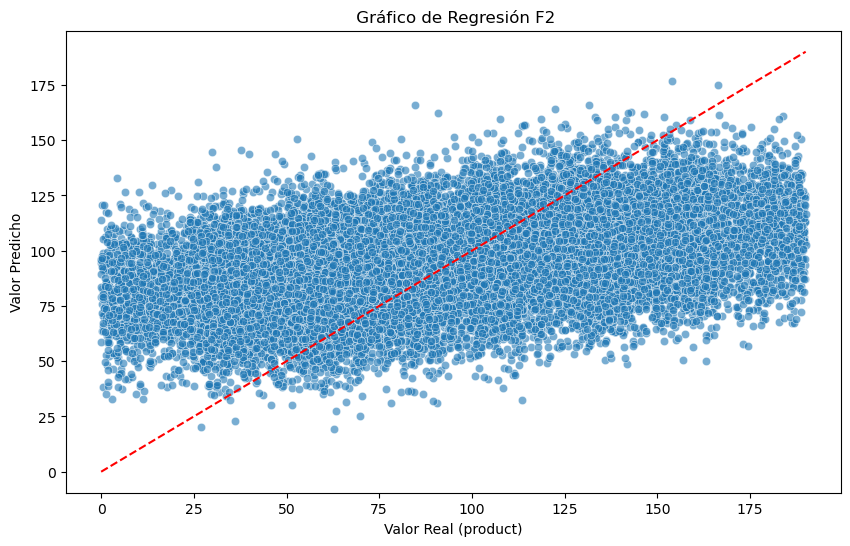

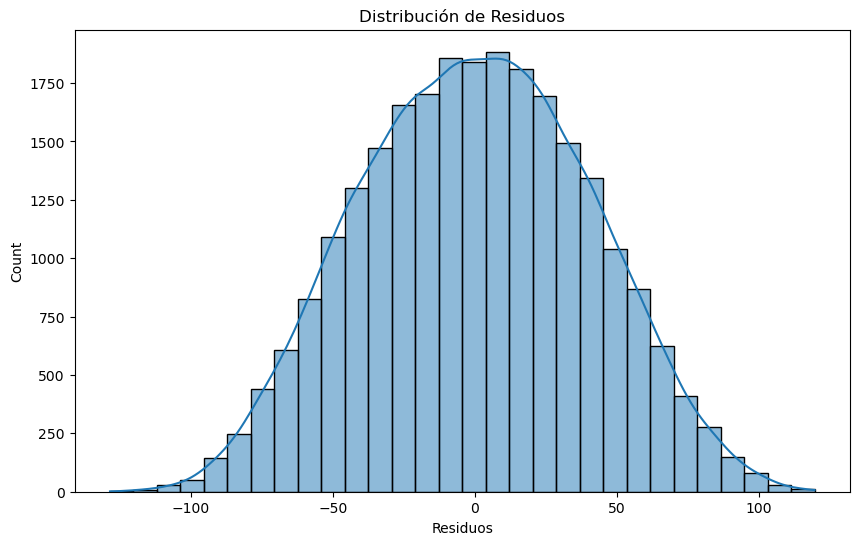

In [19]:
X = geo_data_2[['f0', 'f1', 'f2']]
y = geo_data_2['product']

# Dividimos los datos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Creamos el modelo:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Para las métricas de evaluación del modelo:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


#Gráficos:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia perfecta
plt.xlabel('Valor Real (product)')
plt.ylabel('Valor Predicho')
plt.title(' Gráfico de Regresión F2')
plt.show()

#Los residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos')
plt.show()

En este modelo contamos con un nivel expliativo del 20%, siguiendo la teoría, también es malo. Obtenemos la siguiente ecuación:

--> *product = 80.64 − 0.087(f0) − 0.165(f1) + 5.75(f2)

Podemos decir que los atributos f0 ^ f1 tienen consecuencias negativas, f2 tiene una consecuencia positiva en el producto de 5.75 unidades por cada aumento en f2.

**d) Ejercicio con el df que contiene la totalidad de los datos**

Dentro de ste análisis adjunto el top 200 que se especifica en el principio del proyecto.

Coeficientes: [-0.37259709  1.68587691  8.51618086]
Intercepto: 66.95421704984146
MSE: 1498.41
R²: 0.30


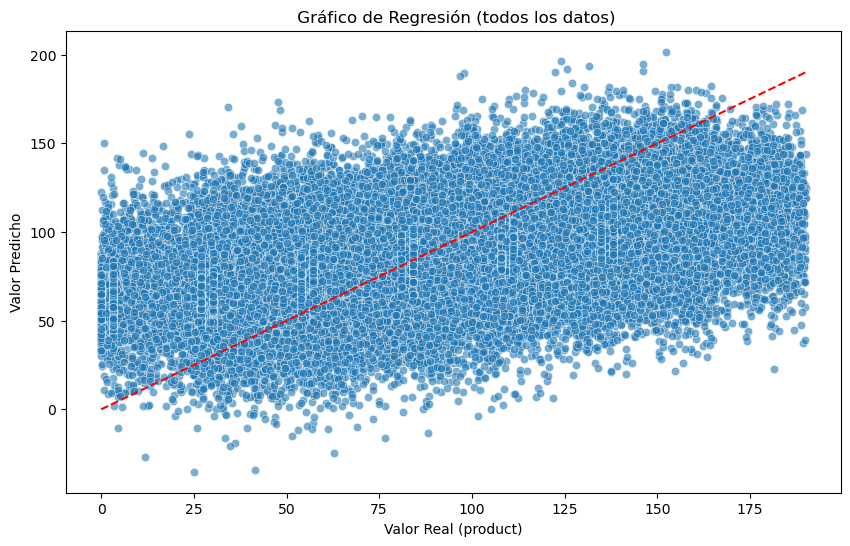

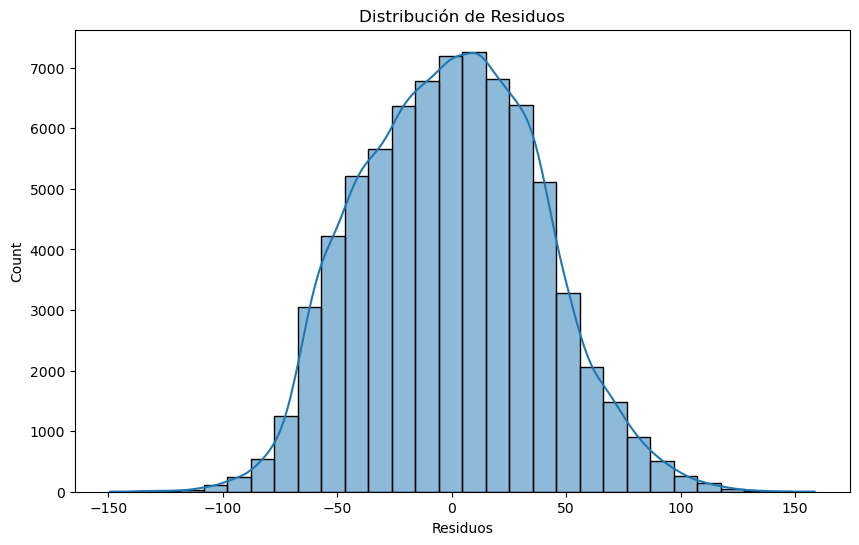

           id   valor_est        f0        f1         f2
203540  4KBhu  215.872341 -2.548791  3.210600  16.739402
298714  C6aBZ  208.317581 -0.209583  1.174825  16.357645
269502  OYrnh  204.443511 -1.145417 -0.650543  16.223146
241820  ZPjVW  203.797551 -0.968576  0.885320  15.850991
243931  rtPef  203.418824 -0.214989  1.849141  15.648691
...       ...         ...       ...       ...        ...
246570  oTUuR  175.150132  2.500566  3.567230  12.107975
57338   6xfga  175.066295 -0.240277  0.948702  12.496583
250500  7mad3  175.065936 -1.538739  0.601836  12.508397
290347  E125U  175.041926  1.478371  0.292540  12.698810
65743   kU92A  175.025333  0.896968 -0.498996  12.828118

[200 rows x 5 columns]


In [20]:
X = geo_data_complete[['f0', 'f1', 'f2']]
y = geo_data_complete['product']

# Dividimos los datos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Creamos el modelo:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Para las métricas de evaluación del modelo:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


#Gráficos:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia perfecta
plt.xlabel('Valor Real (product)')
plt.ylabel('Valor Predicho')
plt.title(' Gráfico de Regresión (todos los datos)')
plt.show()

#Los residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos')
plt.show()

#Para el top 200
geo_data_complete['valor_est'] = model.predict(X)
top_best = geo_data_complete.sort_values(by='valor_est', ascending=False)

n = 200
top_200 = top_best.head(200)

print(top_200[['id', 'valor_est', 'f0', 'f1', 'f2']])

### 3. Cálculo de ganancias

Ya se presentaron los puntos a manera de top 200, tomando en cuenta las 3 regiones, a continuación se sigue el análisis del documento comparando las medias de las regiones. 


In [22]:
print('La media del grupo 0 es:', geo_data_0['product'].mean())
print('La media del grupo 1 es:', geo_data_1['product'].mean())
print('La media del grupo 2 es ', geo_data_2['product'].mean())

# Voy a hacer el ejercicio calculando la media total:
print('La media total de los puntos petrolero es:', geo_data_complete['product'].mean())

La media del grupo 0 es: 92.50000000000001
La media del grupo 1 es: 68.82500000000002
La media del grupo 2 es  95.00000000000004
La media total de los puntos petrolero es: 85.44166666666655


Como podemos observar, las medias son dispares en cuanto a producto son dispares entre el grupo 0, 2 para con el prupo 1. Esto hace que la media total se comporta de una manera distinta.

Esto representa un compromiso para el beneficio, ya que merma la ganancia. 

Enfocandome en las estadísticas de la media del producto en el grupo 1: count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64


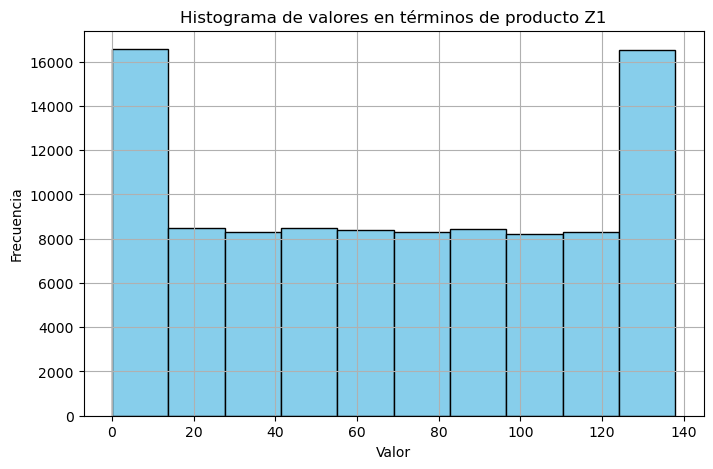

In [26]:
print('Enfocandome en las estadísticas de la media del producto en el grupo 1:', geo_data_1['product'].describe())

plt.figure(figsize=(8, 5))
plt.hist(geo_data_1['product'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de valores en términos de producto Z1')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Esta distribución del producto da esbozo del comportamiento de la variable, ya que, vemos que hay rangos de valores que están tirando la media hacia un valor alto, lo cual confirma la inestabilidad del producto en esta zona, por lo tanto el compromiso de la ganancia.

Vamos a comparar el mismo comportamiento con las otras zonas y en terminos generales , veremos como se sesga la producción en la distribución total.

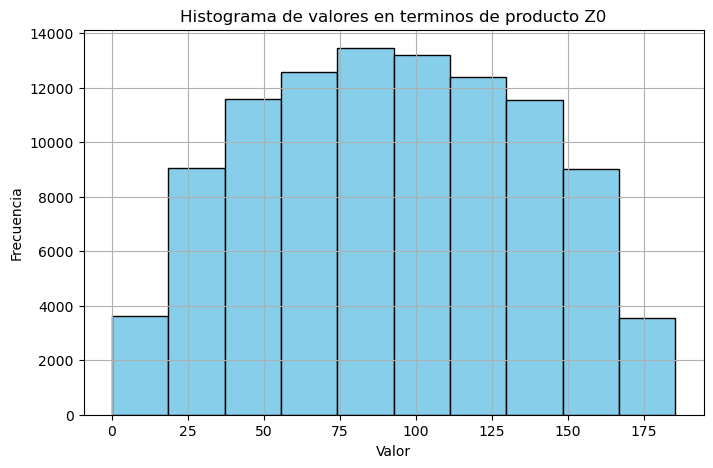

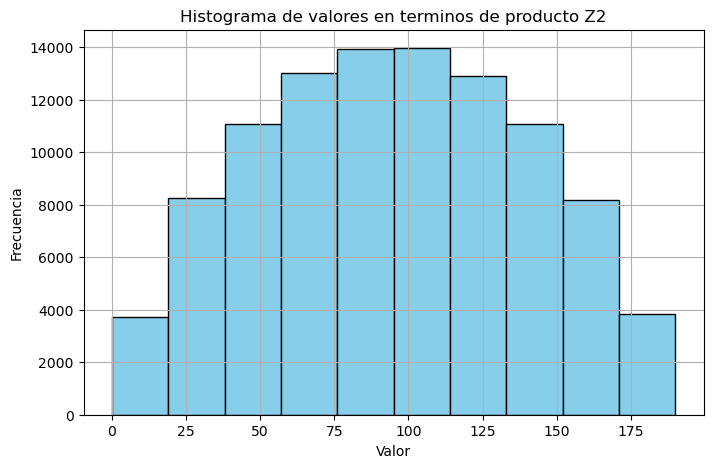

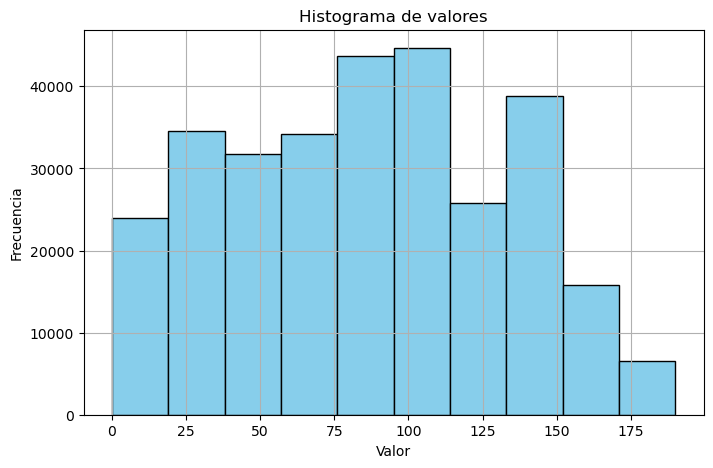

In [29]:
#Para zona 0

plt.figure(figsize=(8, 5))
plt.hist(geo_data_0['product'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de valores en terminos de producto Z0')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Para zona 2

plt.figure(figsize=(8, 5))
plt.hist(geo_data_2['product'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de valores en terminos de producto Z2')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Distribución total:

plt.figure(figsize=(8, 5))
plt.hist(geo_data_complete['product'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de valores')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()




### 4. Cálculo de la ganancia 

In [43]:
#Calculando la ganancia bajo I = PQ, teniendo en cuenta: 

top_200.loc[:, 'gain_est'] = top_200['valor_est'] * 70 #Tomé un precio de 70 que es más o menos el precio de mercado.
top_200

C:\Users\gabri\AppData\Local\Temp\ipykernel_30136\836937294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_200.loc[:, 'gain_est'] = top_200['valor_est'] * 70 #Tomé un precio de 70 que es más o menos el precio de mercado.


,id,f0,f1,f2,product,valor_est,gain,gain_est
203540,4KBhu,-2.548791,3.210600,16.739402,154.062998,215.872341,10784.409863,15111.063904
298714,C6aBZ,-0.209583,1.174825,16.357645,98.664401,208.317581,6906.508094,14582.230659
269502,OYrnh,-1.145417,-0.650543,16.223146,121.349438,204.443511,8494.460672,14311.045735
241820,ZPjVW,-0.968576,0.885320,15.850991,139.562959,203.797551,9769.407120,14265.828587
243931,rtPef,-0.214989,1.849141,15.648691,101.225039,203.418824,7085.752713,14239.317685
...,...,...,...,...,...,...,...,...
246570,oTUuR,2.500566,3.567230,12.107975,167.629822,175.150132,11734.087542,12260.509255
57338,6xfga,-0.240277,0.948702,12.496583,150.206607,175.066295,10514.462499,12254.640666
250500,7mad3,-1.538739,0.601836,12.508397,142.522491,175.065936,9976.574387,12254.615502
290347,E125U,1.478371,0.292540,12.698810,112.523610,175.041926,7876.652726,12252.934842


In [45]:
#Vamos a ver la ganancia media:
gain_mean = top_200['gain_est'].mean()
print('La ganancia media dentro del top 200 sería:',gain_mean,'USD')
print('La ganancia mínima del top 200 sería:', top_200['gain_est'].min(), 'USD')
print('La ganancia máxima dentro del top 200 sería:', top_200['gain_est'].max(), 'USD')

La ganancia media dentro del top 200 sería: 12775.13457204272 USD
La ganancia mínima del top 200 sería: 12251.773322652352 USD
La ganancia máxima dentro del top 200 sería: 15111.063904069513 USD


### 5. El riesgo



In [56]:
PRECIO_POR_UNIDAD = 70
INVERSION_TOTAL = 100000000
def bootstrap_ganancia(df_pozos, n_iter=1000):
    ganancias = []
    for _ in tqdm(range(n_iter), desc="Bootstrapping"):
        # Muestra con reemplazo del mismo tamaño
        muestra = resample(top_200['gain_est'], replace=True)
        ganancia = (muestra.sum() * PRECIO_POR_UNIDAD) - INVERSION_TOTAL
        ganancias.append(ganancia)
    return np.array(ganancias)
ganancias = bootstrap_ganancia(top_200, 1000)
ganancias


Bootstrapping: 100%|██████████| 1000/1000 [00:00<00:00, 1282.27it/s]


array([80723448.89471942, 78950548.80658296, 78077543.74034089,
       78395931.45955414, 78168585.76161942, 79649190.33744511,
       79910564.38961247, 78985465.30464974, 79487285.8495242 ,
       80221982.67147958, 79168145.0028468 , 78517065.87926221,
       78636603.72123197, 78361940.82967257, 78974047.52005911,
       79229562.24064267, 78478552.84494299, 78349534.94479728,
       78381794.97365227, 78645220.41232035, 79102171.2743445 ,
       79171556.48141265, 78967651.94877371, 79417603.54531759,
       78231810.37193295, 78335551.17183763, 79513980.15631074,
       78420834.81439209, 78892013.90905115, 78549230.82072607,
       78080254.44324455, 79233852.93730551, 78385515.9319632 ,
       78156391.19870788, 78600589.23652217, 78588316.78510049,
       77981266.14226398, 78810346.28250569, 79464972.20105305,
       78939271.57394126, 78611310.57911143, 78319242.74038169,
       78631161.5664401 , 78632937.08416352, 78930249.13130003,
       79205423.58492765, 77904550.68526

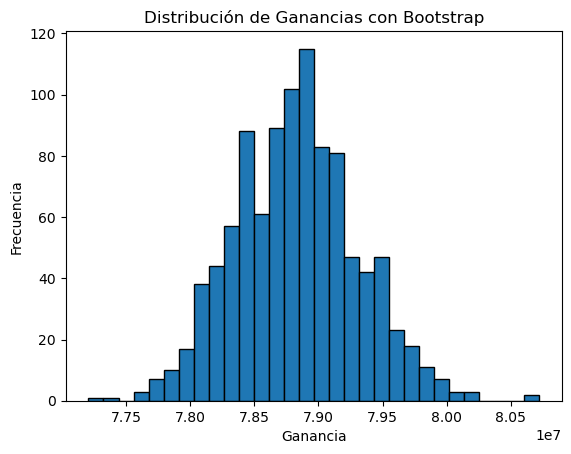

La ganancia media sería: 78826100.80173248
Con una ganancia mínima: 77206418.99611247
Y una ganancia máxima: 80723448.89471942


In [58]:
#Ofrezco esbozo de la ganancia bajo bootstrap y datos relevantes
plt.hist(ganancias, bins=30, edgecolor='black')
plt.title("Distribución de Ganancias con Bootstrap")
plt.xlabel("Ganancia")
plt.ylabel("Frecuencia")
plt.show()

#Para los datos relevantes
print('La ganancia media sería:', ganancias.mean())
print('Con una ganancia mínima:', ganancias.min())
print('Y una ganancia máxima:', ganancias.max())

In [59]:
#Para el intervalo de confianza en un 95%

idc_95 = np.percentile(ganancias, [2.5, 97.5])
print(f"Intervalo de confianza del 95%: {idc_95}")

Intervalo de confianza del 95%: [77926592.37820733 79793337.72596504]


In [ ]:
# Riesgo de pérdidas como proporción
riesgo_perdida = (ganancias < 0).mean()
riesgo_perdida_pct = riesgo_perdida * 100

print(f"Probabilidad de pérdida: {riesgo_perdida:.4f}")
print(f"Riesgo de pérdida (porcentaje): {riesgo_perdida_pct:.2f}%")


Probabilidad de pérdida: 0.0000
Riesgo de pérdida (porcentaje): 0.00%


**Como conclusión puedo decir que la técnica bootstap tuvo un comportamiento más sencillo en cuanto a desarrollo y manejo de los datos, ya que al constrir el top 200, las ganancias quedaron muy cortas.**

**Específicamente en este análisis, la predicción no coincidió con el desarrollo presentado en la parte 4, una razón puede ser que la división con la que trabaja la técnica bootstap se comportó más eficientemente y evitó todos los sesgos estadísticos que encontré en R cuadrado, ya que como se pudo ver, los modelos resultaron no propicios. Aplicar el bootstrapping da una lectura diferente a los datos, ya que en las distribuciones también encontré anomalías, mismas que con la división propia de esta técnica, se corrigieron, y los datos cobraron mejor sentido económico.** 